# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [52]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Save config information
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='

# Build query URL
query_url = url + weather_api_key + '&q='

# set up lists to hold response info
weather = []
weather_dict = []
set_no = 1
count_set = 0
# Loop through the list of cities and perform a request for data on each.
for i, city in enumerate (cities, start =1):
    try:
        final_url = query_url + city
        response = requests.get(final_url).json()
        weather.append(response['weather'][0]['main'])
        count_set+=1
        print(f'Processing Record {count_set}, of Set {set_no} | {city}')
        lat = response['coord']['lat']
        weather_dict.append({'City': city, 'Lat': response['coord']['lat'],
                        'Lng': response['coord']['lon'],'Max Temp': response['main']['temp'],
                        'Humidity': response['main']['humidity'], 'Cloudiness': response['clouds']['all'],
                        'Wind Speed': response['wind']['speed'],'Country': response['sys']['country'],
                        'Date': response['dt']})
        
        if count_set % 50 == 0:
            set_no+=1
            count_set = 0
    except KeyError:
        weather.append("City " + city + " not found.")
        print(f'City {city} not found')

Processing Record 1, of Set 1 | prince rupert
Processing Record 2, of Set 1 | dwarka
City taolanaro not found
Processing Record 3, of Set 1 | rikitea
Processing Record 4, of Set 1 | paamiut
Processing Record 5, of Set 1 | komsomolskiy
Processing Record 6, of Set 1 | padang
Processing Record 7, of Set 1 | marrakesh
Processing Record 8, of Set 1 | vila franca do campo
Processing Record 9, of Set 1 | ushuaia
City khormuj not found
Processing Record 10, of Set 1 | eldorado
Processing Record 11, of Set 1 | hambantota
City tsihombe not found
Processing Record 12, of Set 1 | bredasdorp
Processing Record 13, of Set 1 | mataura
Processing Record 14, of Set 1 | amot
Processing Record 15, of Set 1 | albany
Processing Record 16, of Set 1 | santa isabel do rio negro
Processing Record 17, of Set 1 | sao jose da coroa grande
Processing Record 18, of Set 1 | khatanga
City belushya guba not found
Processing Record 19, of Set 1 | airai
Processing Record 20, of Set 1 | hobart
Processing Record 21, of Set

Processing Record 34, of Set 4 | sur
Processing Record 35, of Set 4 | el naranjo
Processing Record 36, of Set 4 | asaba
City litoral del san juan not found
Processing Record 37, of Set 4 | palestine
Processing Record 38, of Set 4 | coquimbo
City temaraia not found
City eldikan not found
Processing Record 39, of Set 4 | east norriton
Processing Record 40, of Set 4 | ahuimanu
Processing Record 41, of Set 4 | tasiilaq
Processing Record 42, of Set 4 | taos
Processing Record 43, of Set 4 | yulara
Processing Record 44, of Set 4 | chuy
Processing Record 45, of Set 4 | oistins
Processing Record 46, of Set 4 | srednekolymsk
Processing Record 47, of Set 4 | saint-francois
Processing Record 48, of Set 4 | antakya
Processing Record 49, of Set 4 | ahipara
Processing Record 50, of Set 4 | porto santo
City chagda not found
Processing Record 1, of Set 5 | samarai
Processing Record 2, of Set 5 | mackay
Processing Record 3, of Set 5 | vardo
Processing Record 4, of Set 5 | sao filipe
Processing Record 5,

Processing Record 21, of Set 8 | termoli
Processing Record 22, of Set 8 | kuyanovo
Processing Record 23, of Set 8 | tecoanapa
Processing Record 24, of Set 8 | lavumisa
Processing Record 25, of Set 8 | tual
Processing Record 26, of Set 8 | yankton
Processing Record 27, of Set 8 | hualmay
Processing Record 28, of Set 8 | viru
Processing Record 29, of Set 8 | sitka
Processing Record 30, of Set 8 | koslan
Processing Record 31, of Set 8 | sorong
Processing Record 32, of Set 8 | niort
Processing Record 33, of Set 8 | olafsvik
Processing Record 34, of Set 8 | sept-iles
Processing Record 35, of Set 8 | gamba
Processing Record 36, of Set 8 | sioux lookout
Processing Record 37, of Set 8 | arkhonskaya
Processing Record 38, of Set 8 | nadym
Processing Record 39, of Set 8 | tiruchchendur
Processing Record 40, of Set 8 | kargat
Processing Record 41, of Set 8 | ugoofaaru
Processing Record 42, of Set 8 | batsfjord
Processing Record 43, of Set 8 | luwuk
Processing Record 44, of Set 8 | tura
Processing 

In [53]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
#Display the DataFrame
#City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
# create a data frame from cities, lat, and temp

city_data = pd.DataFrame(weather_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,prince rupert,54.3161,-130.3201,22.32,68,90,5.75,CA,1612922956
1,dwarka,22.2394,68.9678,66.99,75,100,6.20,IN,1612922956
2,rikitea,-23.1203,-134.9692,79.41,69,52,6.31,PF,1612922956
3,paamiut,61.9940,-49.6678,27.23,84,95,10.31,GL,1612922816
4,komsomolskiy,40.4272,71.7189,42.80,81,99,6.91,UZ,1612922957


In [54]:
city_data.to_csv('CityData.csv',index = False)

In [55]:
city_data.describe(include ='all')
#Max humidity is <100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,545,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545,5.450000e+02
unique,545,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN
top,constitucion,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,73,NaN
mean,NaN,20.982323,15.516555,47.087303,75.420183,54.218349,7.818183,NaN,1.612923e+09
std,NaN,33.549729,93.321627,32.554701,18.821861,40.359529,5.638937,NaN,8.191173e+01
min,NaN,-54.800000,-175.200000,-38.200000,13.000000,0.000000,0.180000,NaN,1.612923e+09
25%,NaN,-7.000000,-65.019200,21.580000,67.000000,3.000000,3.440000,NaN,1.612923e+09
50%,NaN,25.281900,18.423200,59.380000,81.000000,72.000000,6.730000,NaN,1.612923e+09
75%,NaN,49.283300,100.335400,73.440000,89.000000,95.000000,10.630000,NaN,1.612923e+09


In [56]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

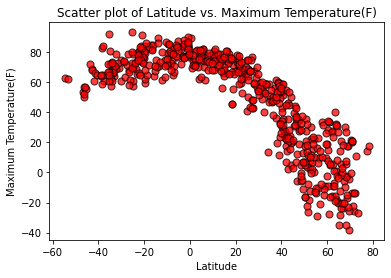

In [57]:
#Latitude vs. Temperature Plot
x_Lat = city_data['Lat']
y_MaxTemp = city_data['Max Temp']
plt.scatter(x_Lat,y_MaxTemp,marker ='o', facecolors = 'red',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Maximum Temperature(F)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
plt.savefig("../ScatterplotLatitudevsTemp.png")

## Summary
* The above scatter plot shows the relation between Latitude and Temperature of locations. 
* The equator is the line of  zero degree latitude. It can be observed that the locations that have the highest temperatures are closer to the equator. 

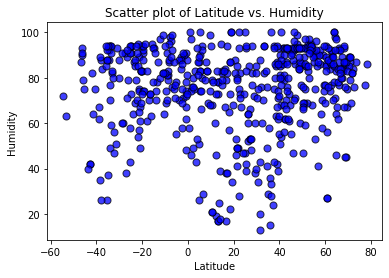

In [58]:
#Latitude vs. Humidity Plot
x_Lat = city_data['Lat']
y_Humidity = city_data['Humidity']
plt.scatter(x_Lat,y_Humidity,marker ='o', facecolors = 'blue',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../ScatterplotLatitudevsHumidity.png")

## Summary
* The above scatter plot is for depicting the Latitude and Humidity of locations. 
* The pointers are distributed across the layout of the plot and indicates that there is no trend or relation between latitude and humidity of locations.

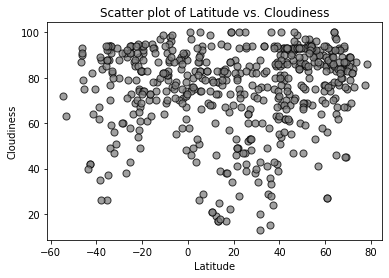

In [59]:
#Latitude vs. Cloudiness Plot
x_Lat = city_data['Lat']
y_Cloud = city_data['Cloudiness']
plt.scatter(x_Lat,y_Humidity,marker ='o', facecolors = 'grey',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../ScatterplotLatitudevsCloudiness.png")

## Summary
* The above scatter plot shows the relation between Latitude and Cloudiness of locations. 
* It can be observed that there is no strong relation between latitude and cloudiness of locations. 

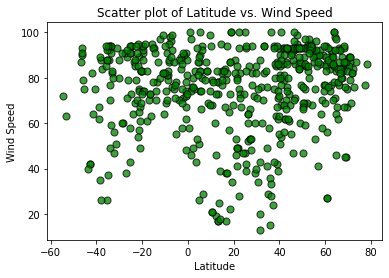

In [60]:
#Latitude vs. Wind Speed Plot
x_Lat = city_data['Lat']
y_WindSpeed = city_data['Wind Speed']
plt.scatter(x_Lat,y_Humidity,marker ='o', facecolors = 'green',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../ScatterplotLatitudevsWindSpeed.png")

## Summary
* The above scatter plot shows the relation between Latitude and Wind Speed of locations. 
* The pointers are distributed across different latitudes and shows no relation between the wind speed and latitude of locations.

In [62]:
#Linear Regression
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_hem = city_data.loc[city_data['Lat']>=0,:].reset_index()
south_hem = city_data.loc[city_data['Lat']<0,:].reset_index()
south_hem

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,rikitea,-23.1203,-134.9692,79.41,69,52,6.31,PF,1612922956
1,5,padang,-0.9492,100.3543,84.20,74,20,2.30,ID,1612922718
2,8,ushuaia,-54.8000,-68.3000,62.60,72,0,4.61,AR,1612922819
3,9,eldorado,-23.7869,-54.2836,68.50,87,87,3.89,BR,1612922958
4,11,bredasdorp,-34.5322,20.0403,57.20,88,87,3.13,ZA,1612922958
...,...,...,...,...,...,...,...,...,...,...
162,528,manokwari,-0.8667,134.0833,82.00,78,100,7.65,ID,1612922836
163,532,namibe,-15.1961,12.1522,70.61,78,97,1.74,AO,1612923049
164,538,puerto leguizamo,-0.1934,-74.7819,78.51,73,95,2.13,CO,1612923051
165,542,rio de janeiro,-22.9028,-43.2075,74.43,94,40,4.61,BR,1612922869


The r value, that is, the correlation between both factors is -0.87.


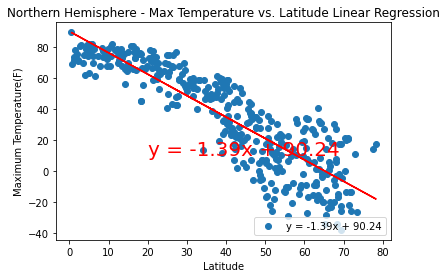

In [63]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_Lat = north_hem['Lat']
y_MaxTemp = north_hem['Max Temp']
correlation = st.pearsonr(x_Lat,y_MaxTemp)
plt.title('Northern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_MaxTemp)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_MaxTemp, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../NorthHemScatterplotLatitudevsMaxTemp.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Temperature of locations of the Northern Hemisphere.
* The correlation between the factors considered, is -0.87 and that shows a strong linear correlation. The locations that are closer to the equator have higher temperatures compared to those that are farther away from the equator.

The r value, that is, the correlation between both factors is 0.58.


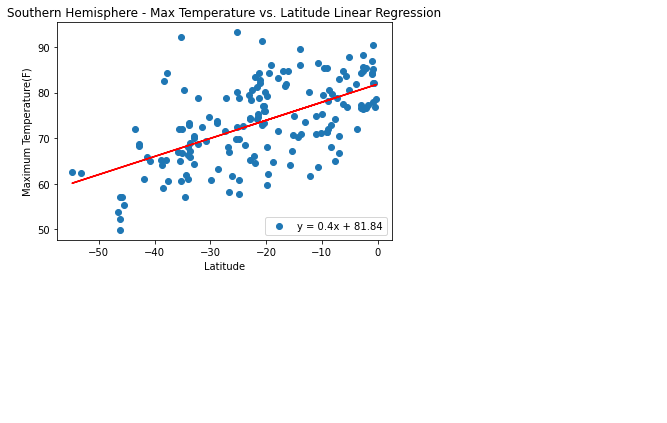

In [64]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_MaxTemp = south_hem['Max Temp']
correlation = st.pearsonr(x_Lat,y_MaxTemp)
plt.title('Southern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_MaxTemp)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_MaxTemp, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../SouthHemScatterplotLatitudevsMaxTemp.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Temperature of locations of the Southern Hemisphere.
* The correlation between the factors considered, is 0.58 and that shows a linear correlation. The temperatures of the locations are higher when they are closer to the equator.

The r value, that is, the correlation between both factors is 0.28.


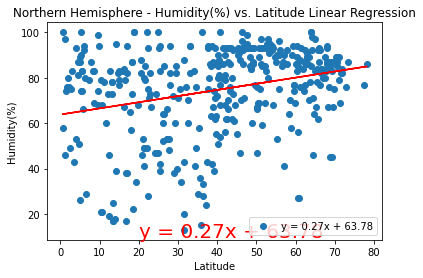

In [65]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_Lat = north_hem['Lat']
y_Humidity = north_hem['Humidity']
correlation = st.pearsonr(x_Lat,y_Humidity)
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Humidity)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Humidity, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../NorthHemScatterplotLatitudevsHumidity.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Humidity of locations of the Northern Hemisphere.
* The correlation between the factors considered, is 0.28 and that shows a weak correlation between the factors considered.

The r value, that is, the correlation between both factors is 0.17.


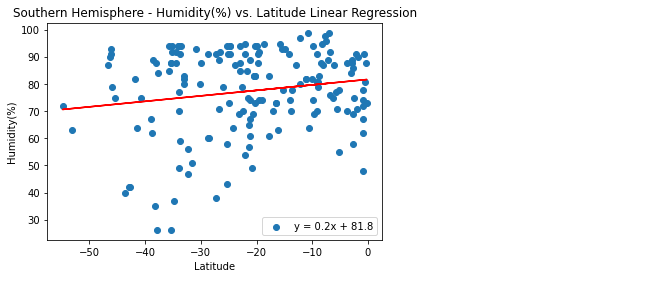

In [66]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_Humidity = south_hem['Humidity']
correlation = st.pearsonr(x_Lat,y_Humidity)
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Humidity)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Humidity, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../SouthHemScatterplotLatitudevsHumidity.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Humidity of locations of the Southern Hemisphere.
* The correlation between the factors considered, is 0.17 and that shows a weak correlation between the considered factors.

The r value, that is, the correlation between both factors is 0.07.


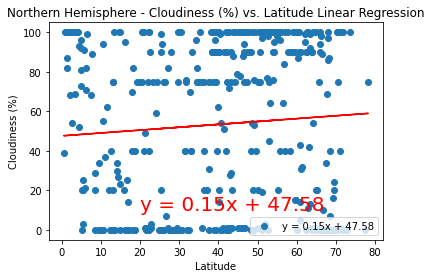

In [67]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶
x_Lat = north_hem['Lat']
y_Cloud = north_hem['Cloudiness']
correlation = st.pearsonr(x_Lat,y_Cloud)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cloud)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Cloud, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../NorthHemScatterplotLatitudevsCloudiness.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Cloudiness of locations of the Northern Hemisphere.
* The correlation between the factors considered, is 0.07 and that shows a weak correlation between the factors considered. The plot depics that the locations can have varying levels of cloudiness throughout the latitude.

The r value, that is, the correlation between both factors is 0.35.


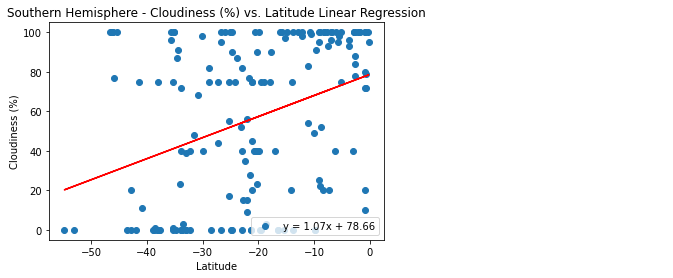

In [68]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_Cloud = south_hem['Cloudiness']
correlation = st.pearsonr(x_Lat,y_Cloud)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cloud)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_Cloud, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../SsouthHemScatterplotLatitudevsCloudiness.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Cloudiness of locations of the Southern Hemisphere.
* The correlation between the factors considered, is 0.35 and that shows a weak correlation between the factors considered. The locations in the Southern hemisphere have varying levels of cloudiness throughout the latitudes.

The r value, that is, the correlation between both factors is 0.04.


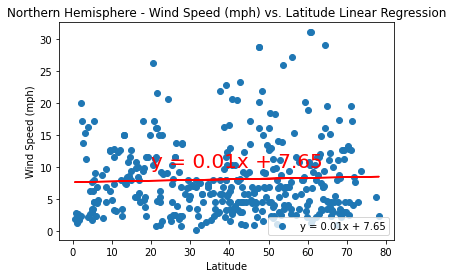

In [69]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_Lat = north_hem['Lat']
y_WindSpeed = north_hem['Wind Speed']
correlation = st.pearsonr(x_Lat,y_WindSpeed)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_WindSpeed)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_WindSpeed, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../NorthHemScatterplotLatitudevsWindSpeed.png")

# Summary
* The above scatter plot shows the correlation between Latitude and Windspeed of locations of the Northern Hemisphere.
* The correlation between the factors considered, is 0.04 and that shows a weak correlation between the factors considered.

The r value, that is, the correlation between both factors is -0.21.


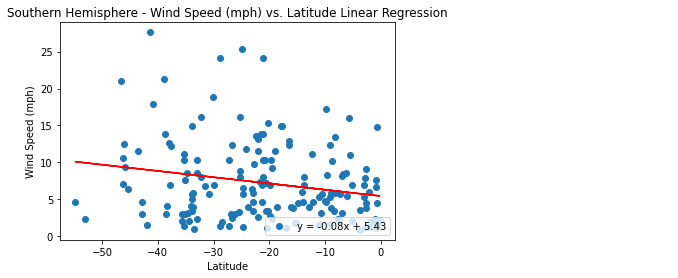

In [73]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_Lat = south_hem['Lat']
y_WindSpeed = south_hem['Wind Speed']
correlation = st.pearsonr(x_Lat,y_WindSpeed)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_WindSpeed)
regress_values = x_Lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_Lat,y_WindSpeed, label = line_eq)
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
plt.legend(loc = 'lower right')
print(f'The r value, that is, the correlation between both factors is {round(correlation[0],2)}.')
plt.savefig("../SouthHemScatterplotLatitudevsWindSpeed.png")

## Summary
* The above scatter plot shows the correlation between Latitude and Windspeed of locations of the Southern Hemisphere.
* The correlation between the factors considered, is -0.21 and that shows a weak correlation between the factors considered. However, the locations that are farther away from the equator have higher wind speeds and the those that are closer to the equator have lower wind speeds.